In [1]:
import os
import pandas as pd 
import numpy as np
import seaborn as sns 
import statsmodels.api as sm 
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.utils import shuffle
import random
from sklearn.impute import SimpleImputer
import statsmodels.imputation.mice as mice
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import time
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression,RidgeClassifier,SGDClassifier,PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC,LinearSVC,NuSVC
from sklearn.neighbors import KNeighborsClassifier,NearestCentroid
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import precision_score,accuracy_score
import missingno as msno
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("water_potability.csv")

In [3]:
data_zero = data.fillna(0)

In [4]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

<AxesSubplot:>

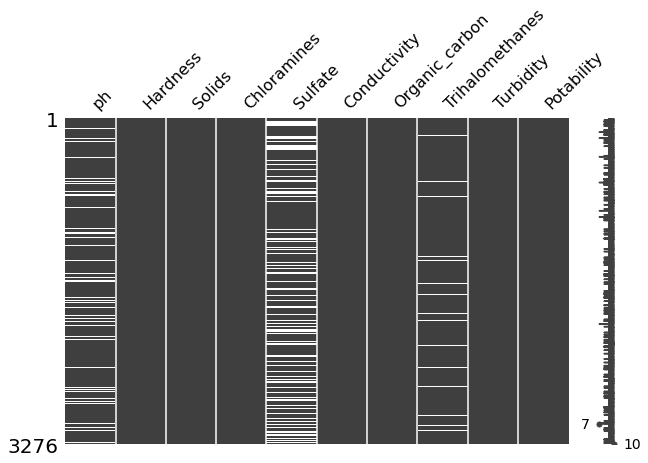

In [5]:
msno.matrix(data, figsize=(10,6))

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


ph: pH of 1. water (0 to 14).

Hardness: Capacity of water to precipitate soap in mg/L.

Solids: Total dissolved solids in ppm.

Chloramines: Amount of Chloramines in ppm.

Sulfate: Amount of Sulfates dissolved in mg/L.

Conductivity: Electrical conductivity of water in μS/cm.

Organic_carbon: Amount of organic carbon in ppm.

Trihalomethanes: Amount of Trihalomethanes in μg/L.

Turbidity: Measure of light emiting property of water in NTU.

Potability: Indicates if water is safe for human consumption. Potable - 1 and Not potable - 0

pH level: The pH of water is a measure of the acid–base equilibrium and, in most natural waters, is controlled by the carbon dioxide–bicarbonate–carbonate equilibrium system. An increased carbon dioxide concentration will therefore lower pH, whereas a decrease will cause it to rise. Temperature will also affect the equilibria and the pH. In pure water, a decrease in pH of about 0.45 occurs as the temperature is raised by 25 °C. In water with a buffering capacity imparted by bicarbonate, carbonate and hydroxyl ions, this temperature effect is modified (APHA, 1989). The pH of most drinking-water lies within the range 6.5–8.5. Natural waters can be of lower pH, as a result of, for example, acid rain or higher pH in limestone areas.

Hardness: The simple definition of water hardness is the amount of dissolved calcium and magnesium in the water. Hard water is high in dissolved minerals, largely calcium and magnesium. You may have felt the effects of hard water, literally, the last time you washed your hands. Depending on the hardness of your water, after using soap to wash you may have felt like there was a film of residue left on your hands. In hard water, soap reacts with the calcium (which is relatively high in hard water) to form "soap scum". When using hard water, more soap or detergent is needed to get things clean, be it your hands, hair, or your laundry.


TDS: TDS means concentration of dissolved particles or solids in water. TDS comprises of inorganic salts such as calcium, magnesium, chlorides, sulfates, bicarbonates, etc, along with many more inorganic compounds that easily dissolve in water.

Chloramines: Chloramines (also known as secondary disinfection) are disinfectants used to treat drinking water and they:

Are most commonly formed when ammonia is added to chlorine to treat drinking water.
Provide longer-lasting disinfection as the water moves through pipes to consumers.
Chloramines have been used by water utilities since the 1930s.

Sulfate: Sulfate (SO4) can be found in almost all natural water. The origin of most sulfate compounds is the oxidation of sulfite ores, the presence of shales, or the industrial wastes. Sulfate is one of the major dissolved components of rain. High concentrations of sulfate in the water we drink can have a laxative effect when combined with calcium and magnesium, the two most common constituents of hardness.

Conductivity: Conductivity is a measure of the ability of water to pass an electrical current. Because dissolved salts and other inorganic chemicals conduct electrical current, conductivity increases as salinity increases. Organic compounds like oil do not conduct electrical current very well and therefore have a low conductivity when in water. Conductivity is also affected by temperature: the warmer the water, the higher the conductivity.

Organic Carbon: Organic contaminants (natural organic substances, insecticides, herbicides, and other agricultural chemicals) enter waterways in rainfall runoff. Domestic and industrial wastewaters also contribute organic contaminants in various amounts. As a result of accidental spills or leaks, industrial organic wastes may enter streams. Some of the contaminants may not be completely removed by treatment processes; therefore, they could become a problem for drinking water sources. It is important to know the organic content in a waterway.

Trihalomethanes: Trihalomethanes (THMs) are the result of a reaction between the chlorine used for disinfecting tap water and natural organic matter in the water. At elevated levels, THMs have been associated with negative health effects such as cancer and adverse reproductive outcomes.

Turbidity: Turbidity is the measure of relative clarity of a liquid. It is an optical characteristic of water and is a measurement of the amount of light that is scattered by material in the water when a light is shined through the water sample. The higher the intensity of scattered light, the higher the turbidity. Material that causes water to be turbid include clay, silt, very tiny inorganic and organic matter, algae, dissolved colored organic compounds, and plankton and other microscopic organisms.

In [7]:
data[data["Chloramines"] > 4]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [8]:
data.Potability = data.Potability.astype('category')

In [9]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000


In [10]:
%%script False
def detect_outliers(data):
    
    for columns in data.columns:
        quantiles=data[columns].quantile(q=[0.25,0.50,0.75]).values
        q1=quantiles[0]
        q2=quantiles[1]
        q3=quantiles[2]
        iqr=q3-q1
        outliers=data[(data[columns] < q1-3*iqr ) | (data[columns] >  q3+ 3*iqr)][columns]

        if len(outliers) !=0: #If outlier exist for that column, print the number of outliers.
            print("number of outliers in", columns, ":", (len(outliers))) 
    else:
        print("No outliers")
detect_outliers(data)

Couldn't find program: 'False'


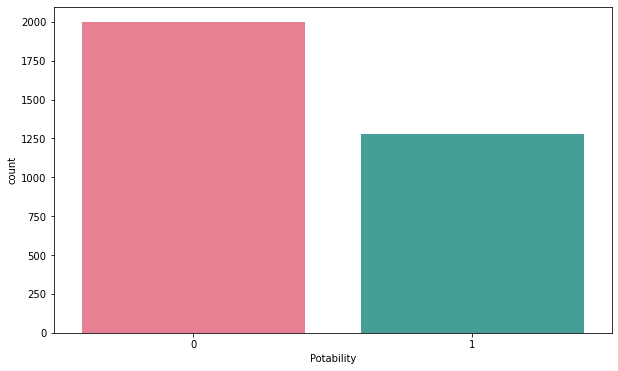

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Potability", data=data, palette='husl');

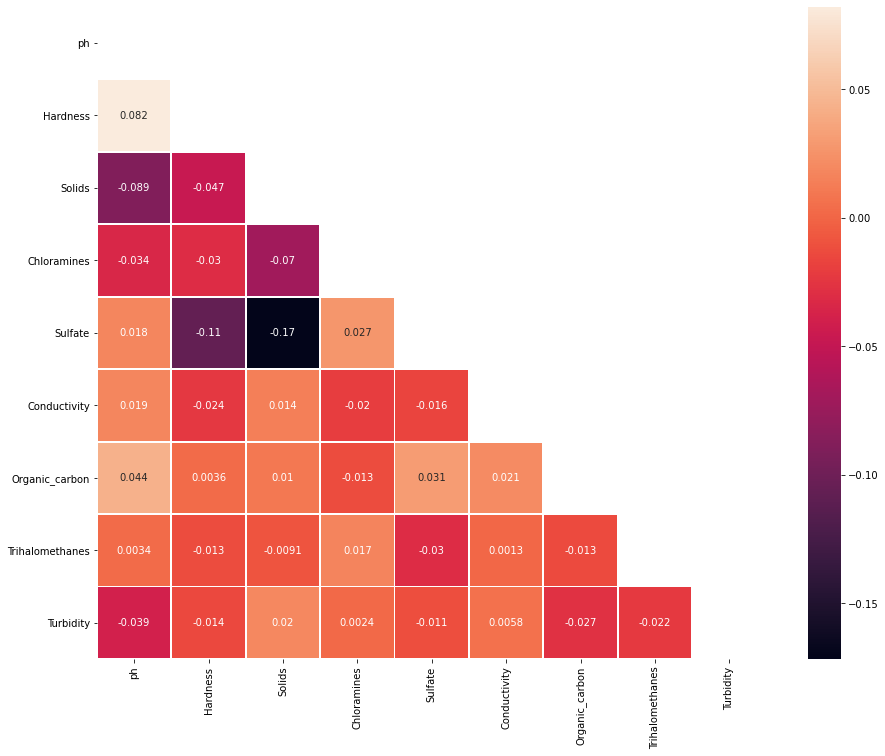

In [12]:
plt.figure(figsize=(15, 12))
matrix = np.triu(data.corr())
sns.heatmap(data.corr(), annot=True,linewidth=.8, mask=matrix, cmap="rocket");

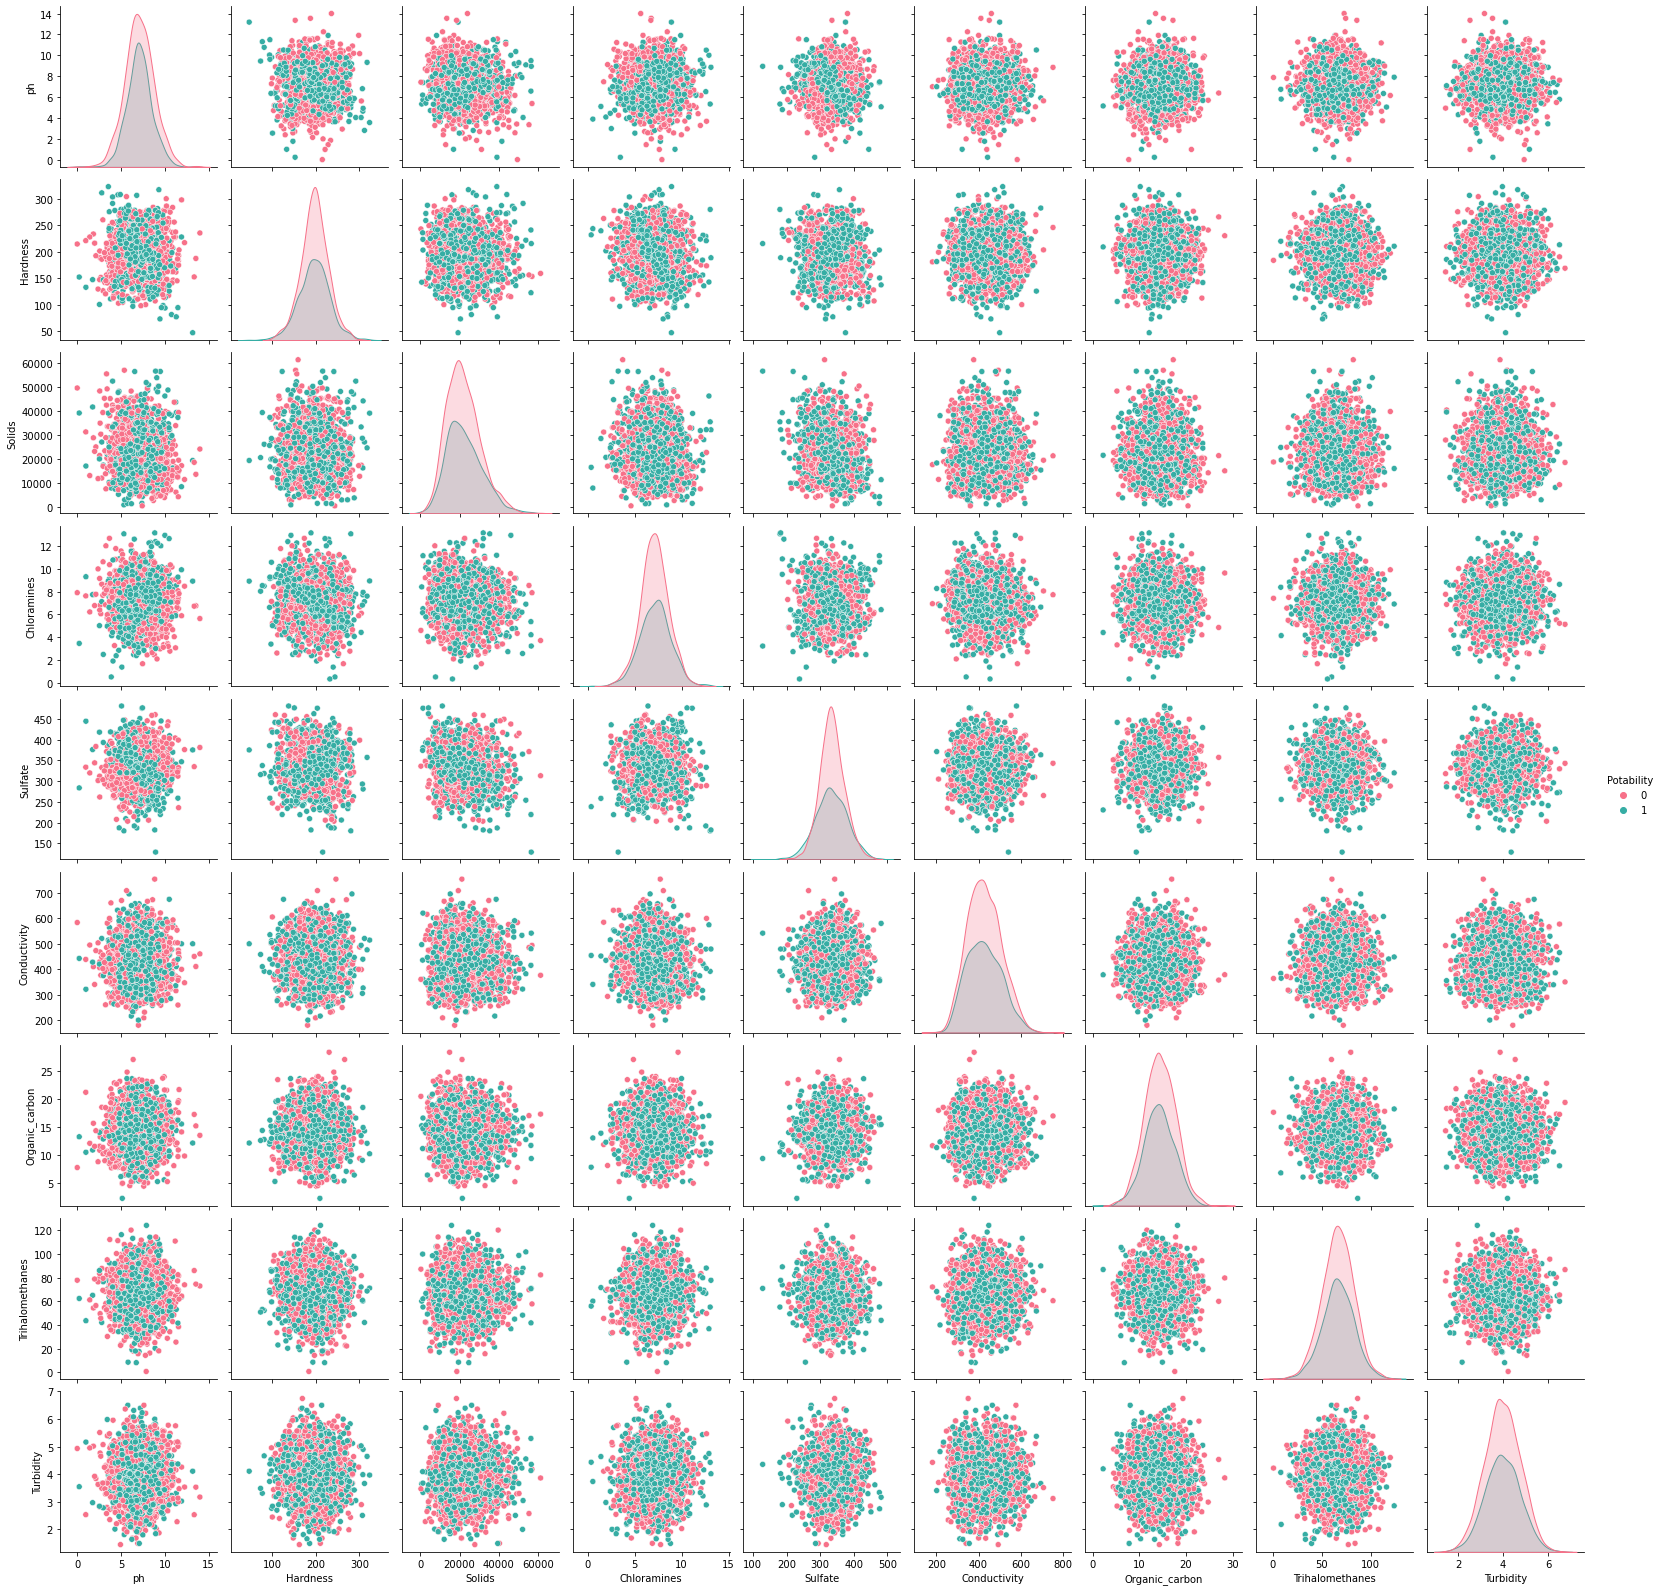

In [13]:
sns.pairplot(data, hue="Potability", palette="husl")

<ipython-input-14-e11648f28f38>:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


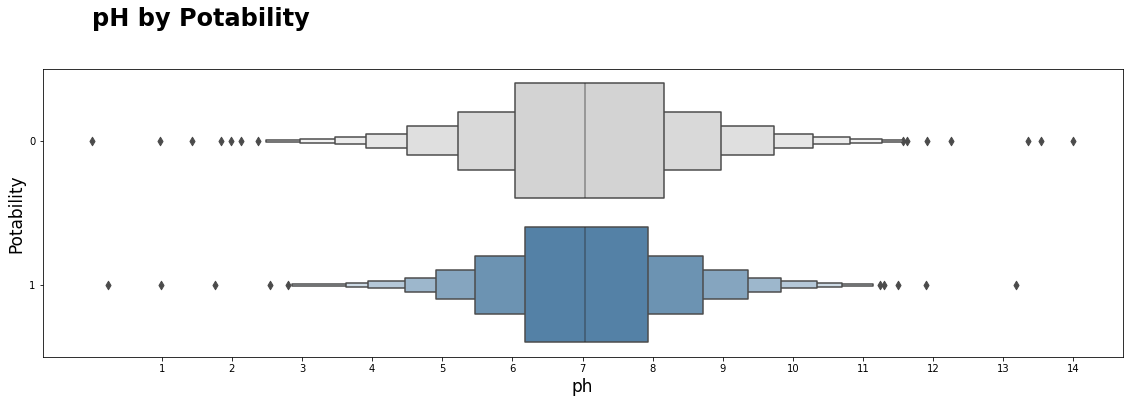

In [14]:
# fig
fig = plt.figure(figsize=(15, 4))

# axes
axes1 = fig.add_axes([0,0,1,1])

# boxplot
sns.boxenplot(x=data['ph'], y=data['Potability'], ax=axes1, palette=['#D3D3D3', 'steelblue'])

# spines
#axes1.spines['left', 'top', 'right'].set_visible(False)

# labels
axes1.set_ylabel('Potability', color='black', fontsize=17)
axes1.set_xlabel('ph', color='black', fontsize=17)

# title
axes1.text(0, -0.8, 'pH by Potability', color='Black', fontsize=24, fontweight='bold')

# ticks
axes1.set_xticks(range(1,15))

fig.show()

C:\Users\Salih\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Salih\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Salih\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(

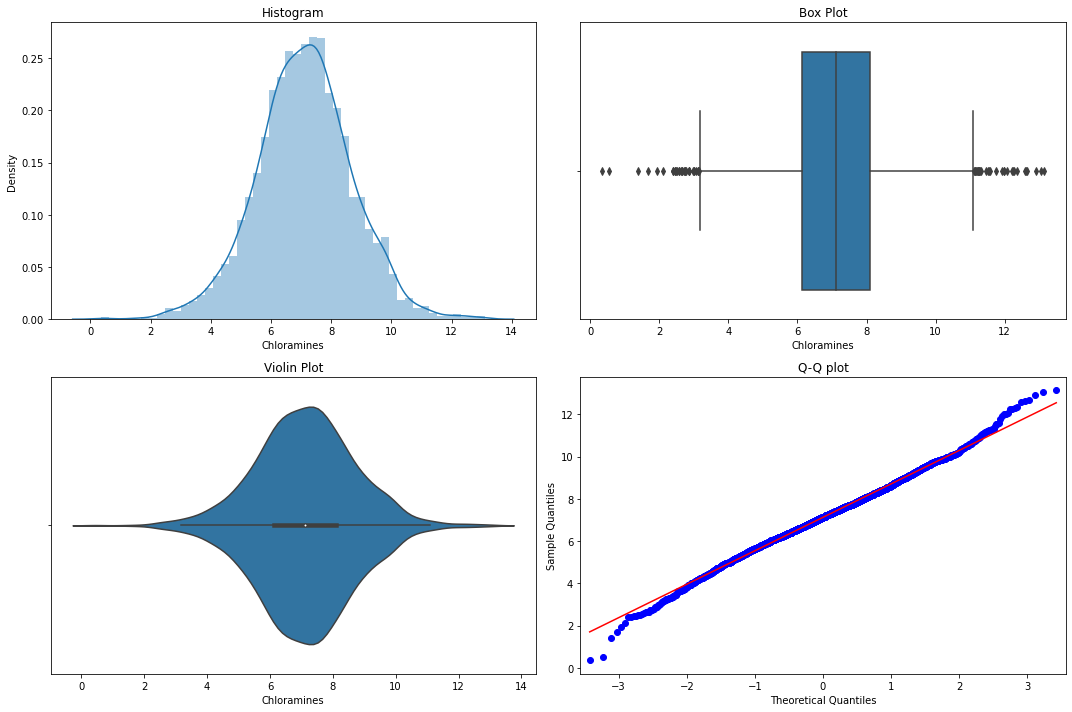

In [15]:
def graphical_analysis(data,column_name, size1, size2):


    figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(size1, size2))


    sns.distplot(data[column_name], ax=axes[0,0]).set_title('Histogram')
    sns.boxplot(data[column_name], ax=axes[0,1]).set_title('Box Plot')
    sns.violinplot(data[column_name], ax=axes[1,0]).set_title('Violin Plot')
    sm.qqplot(data[column_name], line="s", ax=axes[1,1])   
    plt.title("Q-Q plot")    
    figure.tight_layout()



graphical_analysis(data, 'Chloramines', 15,10)

Boxplot and density distribution of different features by Potability



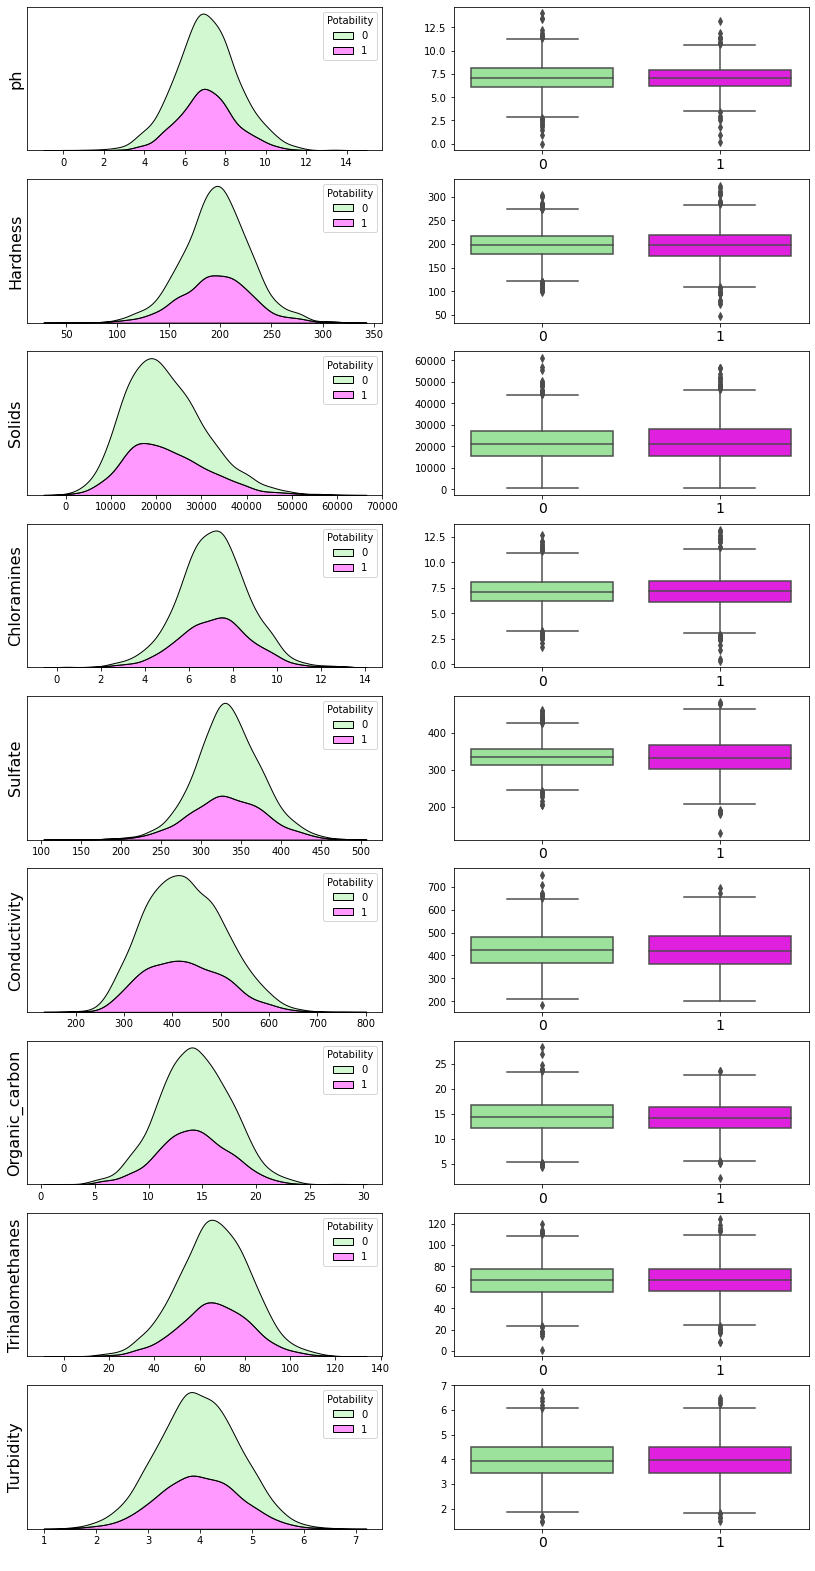

In [16]:
print('Boxplot and density distribution of different features by Potability\n')

fig, ax = plt.subplots(ncols=2, nrows=9, figsize=(14, 28))

features = list(data.columns.drop('Potability'))
i=0
for cols in features:
    sns.kdeplot(data[cols], fill=True, alpha=0.4, hue = data.Potability, 
                palette=('lightgreen', 'fuchsia'), multiple='stack', ax=ax[i,0])
    
    sns.boxplot(data= data, y=cols, x='Potability', ax=ax[i, 1],
               palette=('lightgreen', 'fuchsia'))
    ax[i,0].set_xlabel(' ')
    ax[i,1].set_xlabel(' ')
    ax[i,1].set_ylabel(' ')
    ax[i,1].xaxis.set_tick_params(labelsize=14)
    ax[i,0].tick_params(left=False, labelleft=False)
    ax[i,0].set_ylabel(cols, fontsize=16)
    i=i+1
      
plt.show()

Text(0.5, 1.0, 'Water Potability')

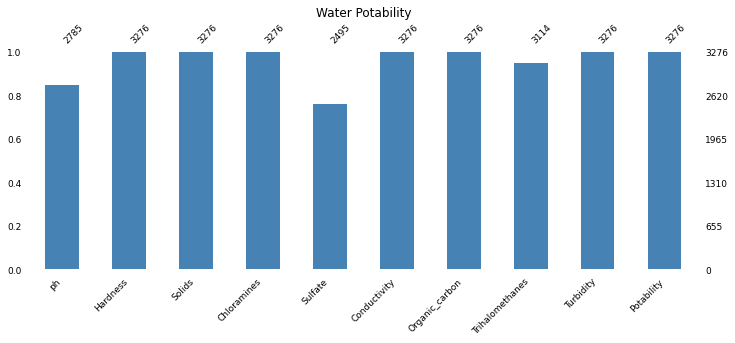

In [17]:
msno.bar(data,  figsize=(12, 4), fontsize=9, color='steelblue').set_title('Water Potability')

In [18]:
data_missing_dropped = data.dropna()

In [19]:
data_missing_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2011 entries, 3 to 3271
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   ph               2011 non-null   float64 
 1   Hardness         2011 non-null   float64 
 2   Solids           2011 non-null   float64 
 3   Chloramines      2011 non-null   float64 
 4   Sulfate          2011 non-null   float64 
 5   Conductivity     2011 non-null   float64 
 6   Organic_carbon   2011 non-null   float64 
 7   Trihalomethanes  2011 non-null   float64 
 8   Turbidity        2011 non-null   float64 
 9   Potability       2011 non-null   category
dtypes: category(1), float64(9)
memory usage: 159.2 KB


<AxesSubplot:xlabel='ph', ylabel='Count'>

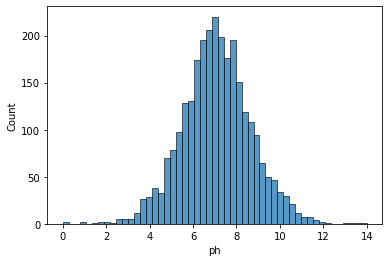

In [20]:
sns.histplot(data=data, x="ph")

For mean/median imputation, firstly data is split into test and train sets. Then train and test sets are split into null and nonnull parts. Mean of nonnull part of train set is imputed into null parts of train and test sets.

In [21]:
X_data_missing_dropped = data_missing_dropped.drop(columns=['Potability'])
y_data_missing_dropped = data_missing_dropped['Potability']

In [22]:
X = data.drop(columns=['Potability'])
y = data['Potability']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_data_missing_dropped, y_data_missing_dropped, test_size=0.2, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
rfc = RandomForestClassifier(n_estimators=200, max_depth=5, min_samples_split=3, random_state=44)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_split=3, n_estimators=200,
                       random_state=44)

In [24]:
rfc.feature_importances_

array([0.21128195, 0.10896329, 0.10525789, 0.1143558 , 0.23938471,
       0.05542782, 0.05249988, 0.06150594, 0.05132272])

<Figure size 600x300 with 0 Axes>

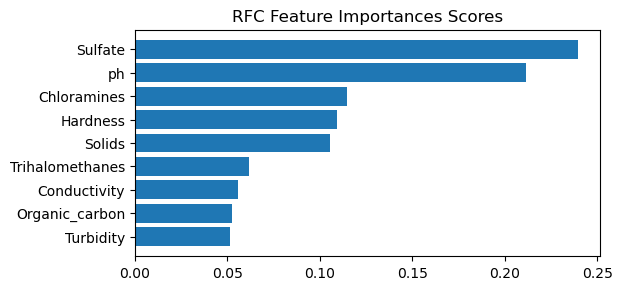

<Figure size 600x300 with 0 Axes>

In [25]:
rfc_feature_imp = rfc.feature_importances_
rfc_feature_imp = pd.Series(rfc_feature_imp, name="RFC Feature Importances Scores")
rfc_feature_imp = rfc_feature_imp.sort_values(ascending=False)
col_namess = reversed(X.columns[rfc_feature_imp.index])
rfc_feature_imp = rfc_feature_imp.sort_values(ascending=True)
width = np.arange(len(rfc_feature_imp))
ticks = col_namess
plt.figure(dpi=100, figsize=(6, 3))
plt.barh(width, rfc_feature_imp)
plt.yticks(width, ticks)
plt.title("RFC Feature Importances Scores")
plt.figure(dpi=100, figsize=(6, 3))

In [26]:
# Weights
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

cw = dict(zip(np.unique(y_data_missing_dropped), compute_class_weight('balanced', np.unique(y_data_missing_dropped), y_data_missing_dropped)))

C:\Users\Salih\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=[0 1], y=3       0
4       0
5       0
6       0
7       0
       ..
3267    1
3268    1
3269    1
3270    1
3271    1
Name: Potability, Length: 2011, dtype: category
Categories (2, int64): [0, 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


### f1 score a bak
Domain info lazım
weighted kullanılabilir potability için ( hangi algoritmalar için kullanılıyor)
mcar,mar,mnar testleri

### Missing Columns Dropped

In [27]:
data_misscol_dropped = data.drop(columns=['ph','Sulfate', 'Trihalomethanes'])
X_data_misscol_dropped = data_misscol_dropped.drop(columns=['Potability'])
y_data_misscol_dropped = data_misscol_dropped['Potability']

In [28]:
X_train_col_drop, X_test_col_drop, y_train_col_drop, y_test_col_drop = train_test_split(X_data_misscol_dropped, y_data_misscol_dropped, stratify = y, test_size=0.3, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train_col_drop)
X_train_col_drop = scaler.transform(X_train_col_drop)
X_test_col_drop = scaler.transform(X_test_col_drop)

In [29]:
models =[("LR", LogisticRegression(max_iter=1000)),("SVC", SVC()),('KNN',KNeighborsClassifier(n_neighbors=10)),
         ("DTC", DecisionTreeClassifier()),
        ("SGDC", SGDClassifier()),("Perc", Perceptron()),("NC",NearestCentroid()),
        ("NuSVC", NuSVC()),("BNB", BernoulliNB()),
         ('RF',RandomForestClassifier()),('ADA',AdaBoostClassifier()),
        ('XGB',XGBClassifier()),('PAC',PassiveAggressiveClassifier())]

results_col_drop = []
names_col_drop = []
finalResults_col_drop = []

for name,model in models:
    model.fit(X_train_col_drop, y_train_col_drop)
    model_results = model.predict(X_test_col_drop)
    score = accuracy_score(y_test_col_drop, model_results)
    results_col_drop.append(score)
    names_col_drop.append(name)
    finalResults_col_drop.append((name,score))
    
finalResults_col_drop.sort(key=lambda k:k[1],reverse=True)

[16:50:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Salih\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [30]:
print("Dropped Test Results")
finalResults_col_drop

Dropped Test Results


[('SVC', 0.6225839267548321),
 ('LR', 0.6103763987792472),
 ('BNB', 0.6103763987792472),
 ('SGDC', 0.6042726347914548),
 ('ADA', 0.6012207527975585),
 ('KNN', 0.5961342828077314),
 ('RF', 0.5910478128179044),
 ('NuSVC', 0.582909460834181),
 ('XGB', 0.5635808748728383),
 ('DTC', 0.5503560528992879),
 ('Perc', 0.5412004069175992),
 ('PAC', 0.5412004069175992),
 ('NC', 0.5269582909460834)]

<ipython-input-31-fd6226aecfe2>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.text(i, round(y[i],2),round(y[i],2), ha = 'center',


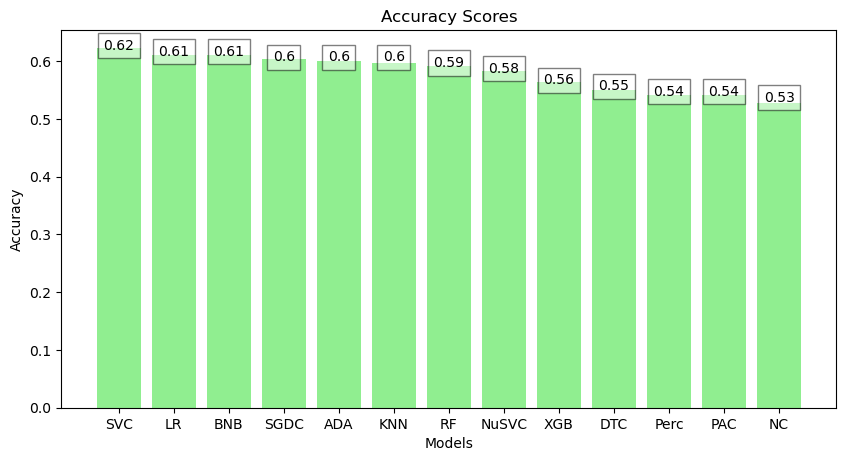

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':100})
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, round(y[i],2),round(y[i],2), ha = 'center',
                 Bbox = dict(facecolor = 'white', alpha = .5))

        
        
if __name__ == '__main__':
    
    # creating data on which bar chart will be plot
    x = pd.DataFrame(finalResults_col_drop)[0]
    y = pd.DataFrame(finalResults_col_drop)[1]
      
    # setting figure size by using figure() function 
    plt.figure(figsize = (10,5))
    
    # making the bar chart on the data with color red
    plt.bar(x, y, color = 'lightgreen')
      
    # calling the function to add value labels
    addlabels(x, y)
      
    # giving title to the plot
    plt.title("Accuracy Scores")
      
    # giving X and Y labels
    plt.xlabel("Models")
    plt.ylabel("Accuracy")
      
    # visualizing the plot
    plt.show()

### Missing Rows Dropped

In [32]:
X_train_drop, X_test_drop, y_train_drop, y_test_drop = train_test_split(X_data_missing_dropped, y_data_missing_dropped, test_size=0.3, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train_drop)
X_train_drop = scaler.transform(X_train_drop)
X_test_drop = scaler.transform(X_test_drop)

In [33]:
models =[("LR", LogisticRegression(max_iter=1000)),("SVC", SVC()),('KNN',KNeighborsClassifier(n_neighbors=10)),
         ("DTC", DecisionTreeClassifier()),
        ("SGDC", SGDClassifier()),("Perc", Perceptron()),("NC",NearestCentroid()),
        ("NuSVC", NuSVC()),("BNB", BernoulliNB()),
         ('RF',RandomForestClassifier()),('ADA',AdaBoostClassifier()),
        ('XGB',XGBClassifier()),('PAC',PassiveAggressiveClassifier())]

results_drop = []
names_drop = []
finalResults_drop = []

for name,model in models:
    model.fit(X_train_drop, y_train_drop)
    model_results = model.predict(X_test_drop)
    score = accuracy_score(y_test_drop, model_results)
    results_drop.append(score)
    names_drop.append(name)
    finalResults_drop.append((name,score))
    
finalResults_drop.sort(key=lambda k:k[1],reverse=True)

[16:50:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Salih\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [34]:
print("Dropped Test Results")
finalResults_drop

Dropped Test Results


[('RF', 0.6821192052980133),
 ('SVC', 0.6804635761589404),
 ('NuSVC', 0.6754966887417219),
 ('XGB', 0.6572847682119205),
 ('KNN', 0.6473509933774835),
 ('DTC', 0.6059602649006622),
 ('LR', 0.5960264900662252),
 ('ADA', 0.5894039735099338),
 ('BNB', 0.5877483443708609),
 ('Perc', 0.5347682119205298),
 ('SGDC', 0.5231788079470199),
 ('PAC', 0.4917218543046358),
 ('NC', 0.4735099337748344)]

<ipython-input-35-414eec658189>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.text(i, round(y[i],2),round(y[i],2), ha = 'center',


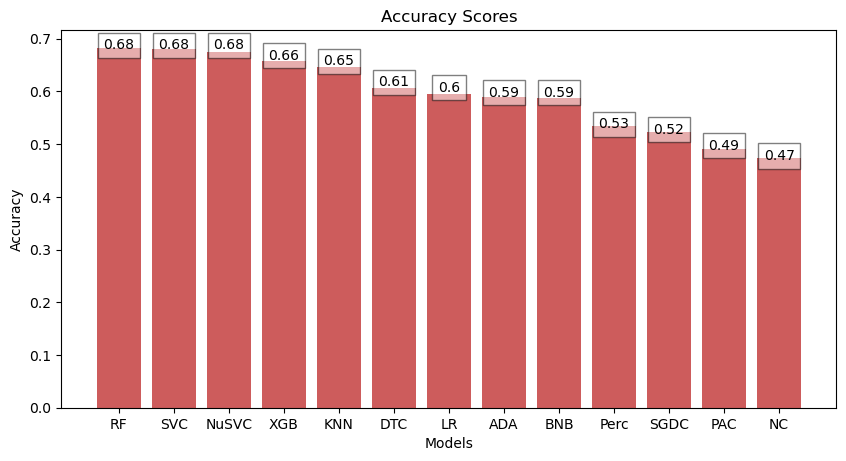

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':100})

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, round(y[i],2),round(y[i],2), ha = 'center',
                 Bbox = dict(facecolor = 'white', alpha = .5))

        
        
if __name__ == '__main__':
    
    # creating data on which bar chart will be plot
    x = pd.DataFrame(finalResults_drop)[0]
    y = pd.DataFrame(finalResults_drop)[1]
      
    # setting figure size by using figure() function 
    plt.figure(figsize = (10,5))
    
    # making the bar chart on the data with color red
    plt.bar(x, y, color = 'indianred')
      
    # calling the function to add value labels
    addlabels(x, y)
      
    # giving title to the plot
    plt.title("Accuracy Scores")
      
    # giving X and Y labels
    plt.xlabel("Models")
    plt.ylabel("Accuracy")
      
    # visualizing the plot
    plt.show()

C:\Users\Salih\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:50:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
RFC: ROC AUC = % 70.05
SVC: ROC AUC = % 71.63
NuSVC: ROC AUC = % 70.65
XGB: ROC AUC = % 67.43
KNN: ROC AUC = % 65.43


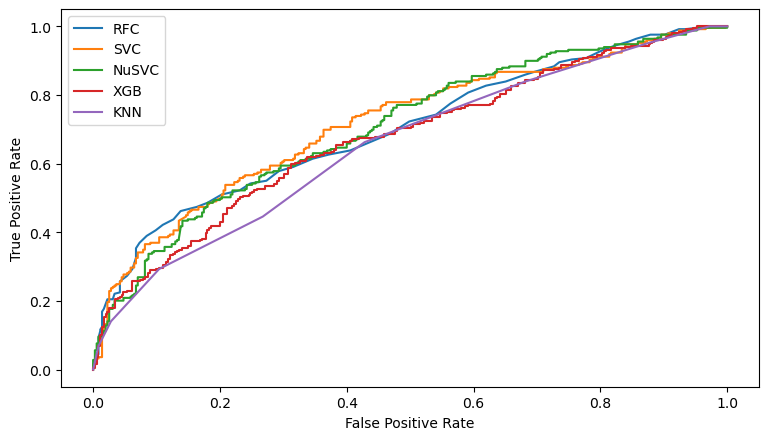

In [36]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
ns_probs = [0 for _ in range(len(y_test_drop))]
ns_auc = roc_auc_score(y_test_drop, ns_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test_drop, ns_probs)

rfc = RandomForestClassifier()
rfc.fit(X_train_drop, y_train_drop)
rfc_probs = rfc.predict_proba(X_test_drop) 
rfc_probs = rfc_probs[:, 1]
rfc_auc = roc_auc_score(y_test_drop, rfc_probs)
rfc_fpr, rfc_tpr, _ = roc_curve(y_test_drop, rfc_probs)

svc = SVC(probability=True)
svc.fit(X_train_drop, y_train_drop)
svc_probs = svc.predict_proba(X_test_drop) 
svc_probs = svc_probs[:, 1]
svc_auc = roc_auc_score(y_test_drop, svc_probs)
svc_fpr, svc_tpr, _ = roc_curve(y_test_drop, svc_probs)

nusvc = NuSVC(probability=True)
nusvc.fit(X_train_drop, y_train_drop)
nusvc_probs = nusvc.predict_proba(X_test_drop) 
nusvc_probs = nusvc_probs[:, 1]
nusvc_auc = roc_auc_score(y_test_drop, nusvc_probs)
nusvc_fpr, nusvc_tpr, _ = roc_curve(y_test_drop, nusvc_probs)

xgb = XGBClassifier()
xgb.fit(X_train_drop, y_train_drop)
xgb_probs = xgb.predict_proba(X_test_drop) 
xgb_probs = xgb_probs[:, 1]
xgb_auc = roc_auc_score(y_test_drop, xgb_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test_drop, xgb_probs)

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_drop, y_train_drop)
knn_probs = knn.predict_proba(X_test_drop) 
knn_probs = knn_probs[:, 1]
knn_auc = roc_auc_score(y_test_drop, knn_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test_drop, knn_probs)

print("RFC: ROC AUC = % {:.2f}".format((rfc_auc)*100))
print("SVC: ROC AUC = % {:.2f}".format((svc_auc)*100))
print("NuSVC: ROC AUC = % {:.2f}".format((nusvc_auc)*100))
print("XGB: ROC AUC = % {:.2f}".format((xgb_auc)*100))
print("KNN: ROC AUC = % {:.2f}".format((knn_auc)*100))

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(rfc_fpr, rfc_tpr, linestyle = "-", label = "RFC")
plt.plot(svc_fpr, svc_tpr, linestyle = "-", label = "SVC")
plt.plot(nusvc_fpr, nusvc_tpr, linestyle = "-", label = "NuSVC")
plt.plot(xgb_fpr, xgb_tpr, linestyle = "-", label = "XGB")
plt.plot(knn_fpr, knn_tpr, linestyle = "-", label = "KNN")
plt.legend()
plt.show()

### Median Imputation

In [37]:
X = data.drop(columns=['Potability'])
y = data['Potability']

In [38]:
# Median imputation 
X_train_med, X_test_med, y_train_med, y_test_med = train_test_split(X, y, test_size=0.3, random_state=42)
median_imp = SimpleImputer(missing_values=np.nan, strategy='median')
X_train_med = median_imp.fit_transform(X_train_med)
X_test_med = median_imp.transform(X_test_med)
scaler = StandardScaler()
scaler.fit(X_train_med)
X_train_med = scaler.transform(X_train_med)
X_test_med = scaler.transform(X_test_med)

In [39]:
pd.DataFrame(X_train_med).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2293 non-null   float64
 1   1       2293 non-null   float64
 2   2       2293 non-null   float64
 3   3       2293 non-null   float64
 4   4       2293 non-null   float64
 5   5       2293 non-null   float64
 6   6       2293 non-null   float64
 7   7       2293 non-null   float64
 8   8       2293 non-null   float64
dtypes: float64(9)
memory usage: 161.4 KB


In [40]:
models =[("LR", LogisticRegression(max_iter=1000)),("SVC", SVC()),('KNN',KNeighborsClassifier(n_neighbors=10)),
         ("DTC", DecisionTreeClassifier()),
        ("SGDC", SGDClassifier()),("Perc", Perceptron()),("NC",NearestCentroid()),
        ("NuSVC", NuSVC()),("BNB", BernoulliNB()),
         ('RF',RandomForestClassifier()),('ADA',AdaBoostClassifier()),
        ('XGB',GradientBoostingClassifier()),('PAC',PassiveAggressiveClassifier())]

results = []
names = []
finalResults_med = []

for name,model in models:
    model.fit(X_train_med, y_train_med)
    model_results = model.predict(X_test_med)
    score = accuracy_score(y_test_med, model_results)
    results.append(score)
    names.append(name)
    finalResults_med.append((name,score))
    
finalResults_med.sort(key=lambda k:k[1],reverse=True)

In [41]:
print("Median Imputation Test Results")
finalResults_med

Median Imputation Test Results


[('SVC', 0.6968463886063072),
 ('RF', 0.6876907426246185),
 ('KNN', 0.6632756866734486),
 ('NuSVC', 0.6632756866734486),
 ('XGB', 0.6612410986775178),
 ('SGDC', 0.6368260427263479),
 ('LR', 0.6286876907426246),
 ('ADA', 0.6286876907426246),
 ('BNB', 0.6276703967446592),
 ('PAC', 0.5564598168870803),
 ('DTC', 0.555442522889115),
 ('Perc', 0.5513733468972533),
 ('NC', 0.5279755849440488)]

In [42]:
pd.DataFrame(finalResults_med)

,0,1
0,SVC,0.696846
1,RF,0.687691
2,KNN,0.663276
3,NuSVC,0.663276
4,XGB,0.661241
5,SGDC,0.636826
6,LR,0.628688
7,ADA,0.628688
8,BNB,0.627670
9,PAC,0.556460


[Text(0, 0.5, 'İçilemez'), Text(0, 1.5, 'İçilebilir')]

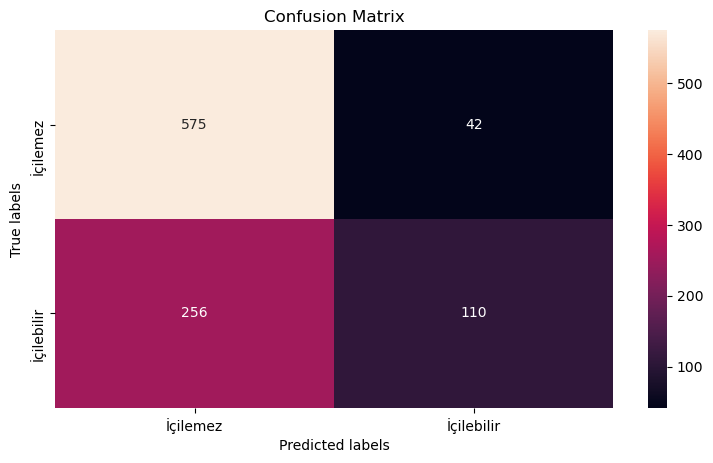

In [43]:
m = SVC()
m.fit(X_train_med, y_train_med)
cm = confusion_matrix(y_test_med, m.predict(X_test_med))

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['İçilemez', 'İçilebilir']); ax.yaxis.set_ticklabels(['İçilemez', 'İçilebilir'])

In [44]:
cm

array([[575,  42],
       [256, 110]], dtype=int64)

<ipython-input-45-6515492571c5>:12: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.text(i, round(y[i],2),round(y[i],2), ha = 'center',


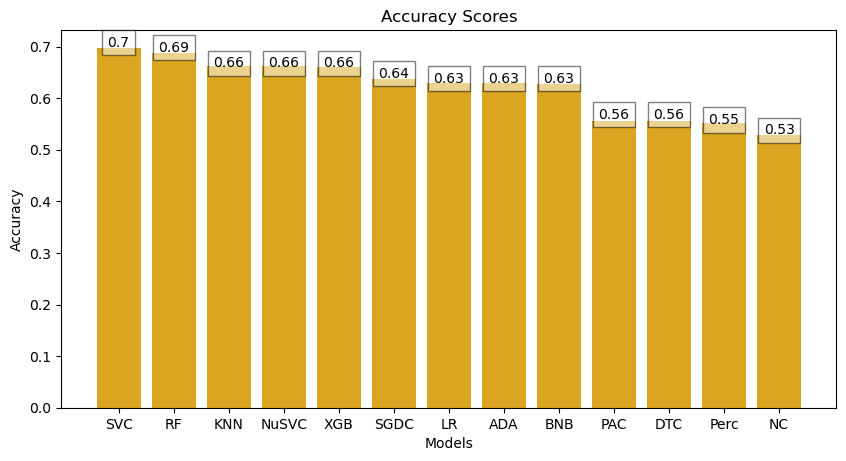

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':100})
#plt.bar(pd.DataFrame(finalResults_med)[0],pd.DataFrame(finalResults_med)[1], color = "goldenrod")
#plt.xlabel('Models')
#plt.ylabel("Accuracy")
#plt.title('Accuracy Scores')
#plt.show()

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, round(y[i],2),round(y[i],2), ha = 'center',
                 Bbox = dict(facecolor = 'white', alpha = .5))

        
        
if __name__ == '__main__':
    
    # creating data on which bar chart will be plot
    x = pd.DataFrame(finalResults_med)[0]
    y = pd.DataFrame(finalResults_med)[1]
      
    # setting figure size by using figure() function 
    plt.figure(figsize = (10,5))
    
    # making the bar chart on the data with color red
    plt.bar(x, y, color = 'goldenrod')
      
    # calling the function to add value labels
    addlabels(x, y)
      
    # giving title to the plot
    plt.title("Accuracy Scores")
      
    # giving X and Y labels
    plt.xlabel("Models")
    plt.ylabel("Accuracy")
      
    # visualizing the plot
    plt.show()

In [46]:
knn = KNeighborsClassifier()

rf = RandomForestClassifier(random_state=42)

ada = AdaBoostClassifier(random_state=42)

svc = SVC( random_state=42)

xgb =XGBClassifier(eval_metric = 'logloss', use_label_encoder=False)


para_knn = {'n_neighbors':np.arange(1, 50)}  #parameters of knn
grid_knn = GridSearchCV(knn, param_grid=para_knn, cv=5,  n_jobs=-1) #search knn for 5 fold cross validation


#parameters for random forest
#n_estimators: The number of trees in the forest.
params_rf = {'n_estimators':[100,200, 350, 500], 'min_samples_leaf':[2, 10, 30]}
grid_rf = GridSearchCV(rf, param_grid=params_rf, cv=5,  n_jobs=-1)

#parameters fpr AdaBoost
params_ada = {'n_estimators': [50,100,250,400,500,600], 'learning_rate': [0.2,0.5,0.8,1]}
grid_ada =  GridSearchCV(ada, param_grid=params_ada, cv=5, n_jobs=-1)

#XGBoost
#parameters for xgboost
params_xgb = {'n_estimators': [50,100,250,400,600,800,1000], 'learning_rate': [0.2,0.5,0.8,1]}
rs_xgb =  RandomizedSearchCV(xgb, param_distributions=params_xgb, cv=5, n_jobs=-1)

#param_svm = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
#grid_svm = GridSearchCV(svc,param_svm,refit=True,verbose=2, n_jobs=-1)

In [47]:
grid_knn.fit(X_train_med, y_train_med)
grid_rf.fit(X_train_med, y_train_med)
grid_ada.fit(X_train_med, y_train_med)
rs_xgb.fit(X_train_med, y_train_med)
#grid_svm.fit(X_train_med,y_train_med)

print("Best parameters for KNN:", grid_knn.best_params_)
print("Best parameters for Random Forest:", grid_rf.best_params_)
print("Best parameters for AdaBoost:", grid_ada.best_params_)
print("Best parameters for XGBoost:", rs_xgb.best_params_)
#print("Best parameters for SVC:", grid_svm.best_params_)

Best parameters for KNN: {'n_neighbors': 47}
Best parameters for Random Forest: {'min_samples_leaf': 10, 'n_estimators': 200}
Best parameters for AdaBoost: {'learning_rate': 0.2, 'n_estimators': 50}
Best parameters for XGBoost: {'n_estimators': 50, 'learning_rate': 0.2}


In [48]:
knn = KNeighborsClassifier(**grid_knn.best_params_)
rf = RandomForestClassifier(**grid_rf.best_params_, random_state=42)
ada = AdaBoostClassifier(**grid_ada.best_params_, random_state=42 )
xgb = XGBClassifier(**rs_xgb.best_params_, random_state=42)
svc = SVC()

In [49]:
classifiers = [('KNN', knn),
                ('RF', rf), ('ADA', ada),
                ('XGB', xgb), ('SVC', svc)]

In [50]:
from sklearn.metrics import accuracy_score
results_hyper = []
names_hyper = []
finalResults_hyper = []
for classifier_name, classifier in classifiers:
 
    # Fit clf to the training set
    classifier.fit(X_train_med, y_train_med)    
   
    # Predict y_pred
    y_pred = classifier.predict(X_test_med)
    accuracy = accuracy_score(y_test_med,y_pred)
    

   
    # Evaluate clf's accuracy on the test set
    #print('{:s} : {:.2f}'.format(classifier_name, accuracy))
    results_hyper.append(accuracy)
    names_hyper.append(classifier_name)
    finalResults_hyper.append((classifier_name,accuracy))
finalResults_hyper.sort(key=lambda k:k[1],reverse=True) 

C:\Users\Salih\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:50:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [51]:
finalResults_hyper

[('SVC', 0.6968463886063072),
 ('RF', 0.6836215666327569),
 ('XGB', 0.6653102746693794),
 ('KNN', 0.6612410986775178),
 ('ADA', 0.6368260427263479)]

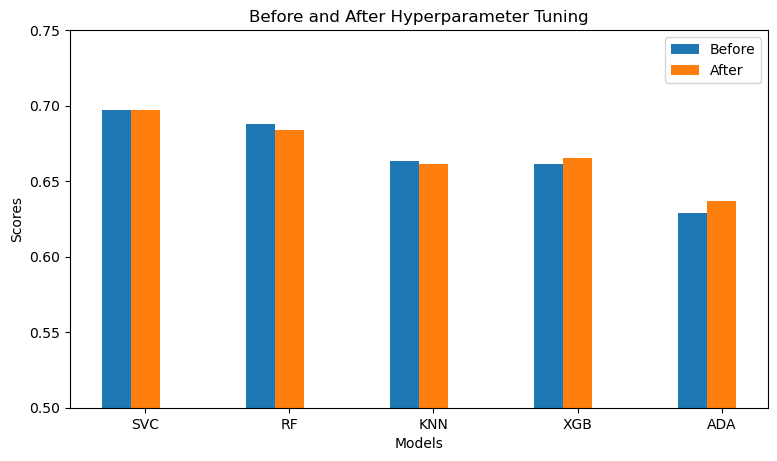

In [52]:
x = np.arange(5)
width = 0.2
plt.bar(x-0.2,pd.DataFrame(finalResults_med).set_index(0).loc[['SVC','RF','KNN','XGB','ADA']][1], width)
plt.bar(x,pd.DataFrame(finalResults_hyper).set_index(0).loc[['SVC','RF','KNN','XGB','ADA']][1], width)
plt.xticks(x, ['SVC','RF','KNN','XGB','ADA'])
plt.xlabel("Models")
plt.ylabel("Scores")
plt.title("Before and After Hyperparameter Tuning")
plt.ylim((0.5,0.75))
plt.legend(["Before", "After"])
plt.show()

### KNN Imputation

In [53]:
X = data.drop(columns=['Potability'])
y = data['Potability']

In [54]:
X_train_KNN, X_test_KNN, y_train_KNN, y_test_KNN = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
X_train_KNN = imputer.fit_transform(X_train_KNN)
X_test_KNN = imputer.transform(X_test_KNN)
scaler = StandardScaler()
scaler.fit(X_train_KNN)
X_train_KNN = scaler.transform(X_train_KNN)
X_test_KNN = scaler.transform(X_test_KNN)

In [55]:
results_KNN = []
names_KNN = []
finalResults_KNN = []

for name,model in models:
    model.fit(X_train_KNN, y_train_KNN)
    model_results = model.predict(X_test_KNN)
    score = accuracy_score(y_test_KNN, model_results)
    results.append(score)
    names.append(name)
    finalResults_KNN.append((name,score))
    
finalResults_KNN.sort(key=lambda k:k[1],reverse=True)

In [56]:
print("KNN Imputation Test Results")
finalResults_KNN

KNN Imputation Test Results


[('SVC', 0.681586978636826),
 ('RF', 0.6510681586978637),
 ('XGB', 0.646998982706002),
 ('KNN', 0.6337741607324516),
 ('NuSVC', 0.6276703967446592),
 ('ADA', 0.6154628687690743),
 ('LR', 0.6103763987792472),
 ('BNB', 0.6103763987792472),
 ('DTC', 0.6063072227873856),
 ('PAC', 0.5412004069175992),
 ('SGDC', 0.5371312309257376),
 ('NC', 0.5218718209562564),
 ('Perc', 0.5015259409969481)]

<ipython-input-57-264c3271a27a>:11: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.text(i, round(y[i],2),round(y[i],2), ha = 'center',


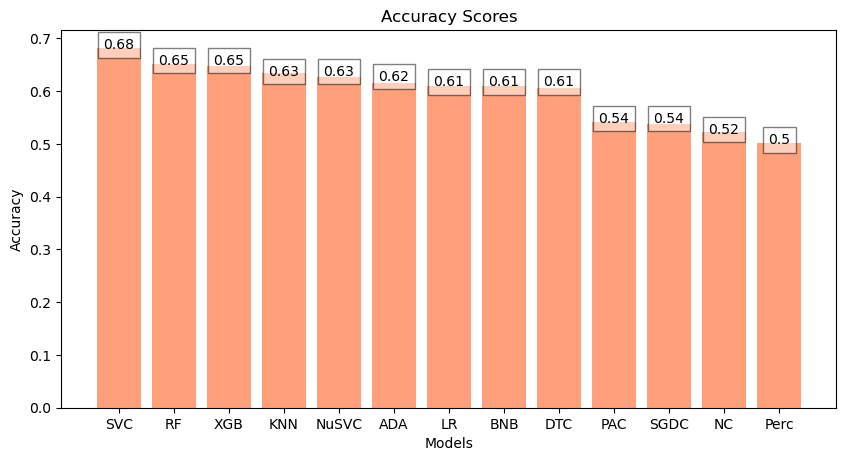

In [57]:
%matplotlib inline
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':100})
#plt.bar(pd.DataFrame(finalResults_med)[0],pd.DataFrame(finalResults_med)[1], color = "goldenrod")
#plt.xlabel('Models')
#plt.ylabel("Accuracy")
#plt.title('Accuracy Scores')
#plt.show()

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, round(y[i],2),round(y[i],2), ha = 'center',
                 Bbox = dict(facecolor = 'white', alpha = .5))

        
        
if __name__ == '__main__':
    
    # creating data on which bar chart will be plot
    x = pd.DataFrame(finalResults_KNN)[0]
    y = pd.DataFrame(finalResults_KNN)[1]
      
    # setting figure size by using figure() function 
    plt.figure(figsize = (10,5))
    
    # making the bar chart on the data with color red
    plt.bar(x, y, color = 'lightsalmon')
      
    # calling the function to add value labels
    addlabels(x, y)
      
    # giving title to the plot
    plt.title("Accuracy Scores")
      
    # giving X and Y labels
    plt.xlabel("Models")
    plt.ylabel("Accuracy")
      
    # visualizing the plot
    plt.show()

### XGB Imputation

In [58]:
X = data.drop(columns=['Potability'])
y = data['Potability']

In [59]:
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X, y, stratify = y, test_size=0.3, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train_xgb)
X_train_xgb = scaler.transform(X_train_xgb)
X_test_xgb = scaler.transform(X_test_xgb)

In [60]:
X.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype='object')

In [61]:
X_train_xgb = pd.DataFrame(X_train_xgb)
X_test_xgb = pd.DataFrame(X_test_xgb)
X_test_xgb.columns = X.columns
X_train_xgb.columns = X.columns
X_test_xgb

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.427943,-0.047278,0.058656,-0.618052,1.985379,-0.694867,-1.009486,NaN,0.931724
1,NaN,0.256441,0.597525,0.187722,-0.697727,-0.227915,1.302598,-0.284593,0.803964
2,-0.282676,0.260864,-0.148299,-0.740807,-0.495880,0.341402,0.537824,-0.860892,-0.333593
3,-2.290173,0.343402,1.321417,1.049895,1.196366,0.169991,-0.140125,-2.211316,0.273057
4,NaN,-0.199277,0.145738,-0.383248,-0.855096,-0.161516,-0.245397,-0.938589,-1.270843
...,...,...,...,...,...,...,...,...,...
978,0.321810,-0.751578,-1.238779,0.832129,NaN,-0.336324,-0.521145,-0.892366,-0.930947
979,0.244480,-0.325721,-0.249598,0.669651,0.841498,0.581968,-0.653670,2.412670,0.158416
980,-0.091284,0.701002,-1.306215,2.067126,NaN,0.310080,-0.015338,-0.305329,-0.365446
981,-0.982855,0.668042,0.032012,-0.411720,NaN,-0.186432,-0.496765,-1.344082,0.793177


In [62]:
import xgboost as xgb
missing_columns = ["Trihalomethanes", "Sulfate", "ph"]
for feature in missing_columns:
    parameters = ["Hardness", "Solids", "Chloramines", "Conductivity", "Organic_carbon", "Turbidity"]
   
    model = xgb.XGBRegressor(objective="reg:squarederror", max_depth = 7, min_child_weight = X.shape[0]/50, n_jobs = -1,
                             n_estimators = 100, random_state = 42)
    model.fit(X_train_xgb[parameters],X_train_xgb[feature])
   
    X_train_xgb.loc[X_train_xgb[feature].isnull(), feature] = model.predict(X_train_xgb[parameters])[X_train_xgb[feature].isnull()]
    X_test_xgb.loc[X_test_xgb[feature].isnull(), feature] = model.predict(X_test_xgb[parameters])[X_test_xgb[feature].isnull()]

In [63]:
results_xgb = []
names_xgb = []
finalResults_xgb = []

for name,model in models:
    model.fit(X_train_xgb, y_train_xgb)
    model_results = model.predict(X_test_xgb)
    score = accuracy_score(y_test_xgb, model_results)
    results.append(score)
    names.append(name)
    finalResults_xgb.append((name,score))
    
finalResults_xgb.sort(key=lambda k:k[1],reverse=True)

In [64]:
print("XGB Imputation Test Results")
finalResults_xgb

XGB Imputation Test Results


[('SVC', 0.6744659206510681),
 ('XGB', 0.6510681586978637),
 ('RF', 0.6490335707019329),
 ('NuSVC', 0.6388606307222787),
 ('KNN', 0.6317395727365208),
 ('LR', 0.6103763987792472),
 ('BNB', 0.6103763987792472),
 ('ADA', 0.6103763987792472),
 ('DTC', 0.5635808748728383),
 ('SGDC', 0.5523906408952187),
 ('PAC', 0.5483214649033571),
 ('NC', 0.5391658189216684),
 ('Perc', 0.5361139369277721)]

<ipython-input-65-3e8ecb5062b9>:11: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.text(i, round(y[i],2),round(y[i],2), ha = 'center',


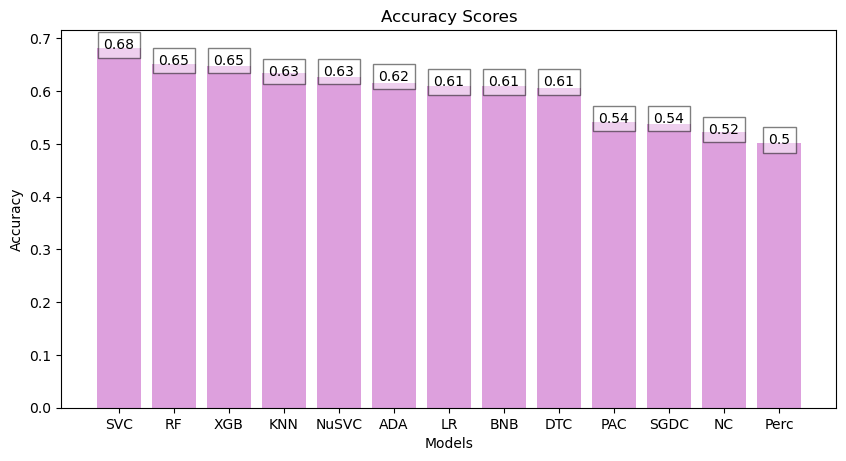

In [65]:
%matplotlib inline
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':100})
#plt.bar(pd.DataFrame(finalResults_med)[0],pd.DataFrame(finalResults_med)[1], color = "goldenrod")
#plt.xlabel('Models')
#plt.ylabel("Accuracy")
#plt.title('Accuracy Scores')
#plt.show()

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, round(y[i],2),round(y[i],2), ha = 'center',
                 Bbox = dict(facecolor = 'white', alpha = .5))

        
        
if __name__ == '__main__':
    
    # creating data on which bar chart will be plot
    x = pd.DataFrame(finalResults_KNN)[0]
    y = pd.DataFrame(finalResults_KNN)[1]
      
    # setting figure size by using figure() function 
    plt.figure(figsize = (10,5))
    
    # making the bar chart on the data with color red
    plt.bar(x, y, color = 'plum')
      
    # calling the function to add value labels
    addlabels(x, y)
      
    # giving title to the plot
    plt.title("Accuracy Scores")
      
    # giving X and Y labels
    plt.xlabel("Models")
    plt.ylabel("Accuracy")
      
    # visualizing the plot
    plt.show()

### Undersampling 

In [66]:
def random_undersampling(X, y):
    
    num_sample = y[y==1].shape[0]
    index_1 = y[y==0].sample(num_sample, random_state=3).index
    index_2 = y[y==1].sample(num_sample, random_state=3).index
  
    
    all_indexes = list(index_1) + list(index_2)

    X_ = X.loc[all_indexes]
    y_ = y[all_indexes]
    
    return X_, y_

In [67]:
X = data.drop(columns=['Potability'])
y = data['Potability']

In [68]:
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

In [69]:
X_train_under, y_train_under = random_undersampling(X_train_under, y_train_under)

In [70]:
# Median Imputation with resampled data
median_imp = SimpleImputer(missing_values=np.nan, strategy='median')
X_train_under_med = median_imp.fit_transform(X_train_under)
X_test_under_med = median_imp.transform(X_test_under)
scaler = StandardScaler()
scaler.fit(X_train_under_med)
X_train_under_med = scaler.transform(X_train_under_med)
X_test_under_med = scaler.transform(X_test_under_med)

In [71]:
results_under_med = []
names_under_med = []
finalResults_under_med = []

for name,model in models:
    model.fit(X_train_under_med, y_train_under)
    model_results = model.predict(X_test_under_med)
    score = accuracy_score(y_test_under, model_results)
    results_under_med.append(score)
    names_under_med.append(name)
    finalResults_under_med.append((name,score))
    
finalResults_under_med.sort(key=lambda k:k[1],reverse=True)

In [72]:
print("Median Imputation with Undersampled Data Results")
finalResults_under_med

Median Imputation with Undersampled Data Results


[('SVC', 0.6256358087487284),
 ('RF', 0.6063072227873856),
 ('KNN', 0.5961342828077314),
 ('NuSVC', 0.5859613428280773),
 ('XGB', 0.5778229908443541),
 ('DTC', 0.5737538148524923),
 ('ADA', 0.5473041709053916),
 ('LR', 0.5279755849440488),
 ('NC', 0.5249237029501526),
 ('BNB', 0.5218718209562564),
 ('Perc', 0.4923702950152594),
 ('PAC', 0.4842319430315361),
 ('SGDC', 0.47711088504577825)]

<ipython-input-73-d2c10ac76f0f>:11: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.text(i, round(y[i],2),round(y[i],2), ha = 'center',


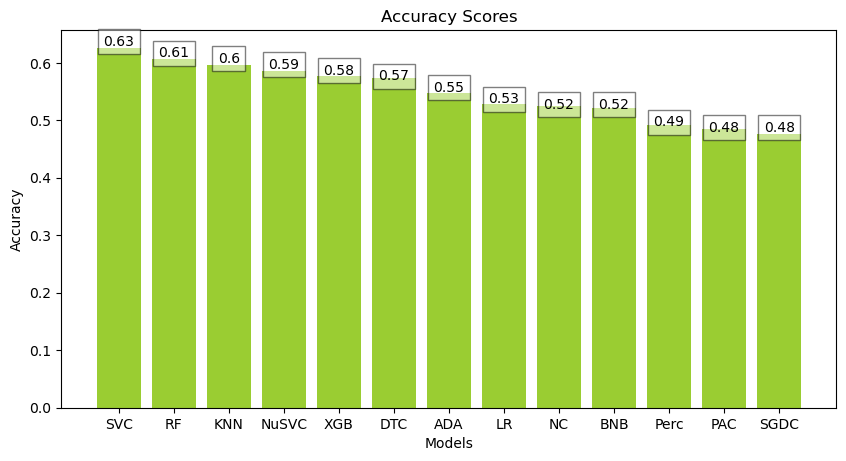

In [73]:
%matplotlib inline
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':100})
#plt.bar(pd.DataFrame(finalResults_med)[0],pd.DataFrame(finalResults_med)[1], color = "goldenrod")
#plt.xlabel('Models')
#plt.ylabel("Accuracy")
#plt.title('Accuracy Scores')
#plt.show()

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, round(y[i],2),round(y[i],2), ha = 'center',
                 Bbox = dict(facecolor = 'white', alpha = .5))

        
        
if __name__ == '__main__':
    
    # creating data on which bar chart will be plot
    x = pd.DataFrame(finalResults_under_med)[0]
    y = pd.DataFrame(finalResults_under_med)[1]
      
    # setting figure size by using figure() function 
    plt.figure(figsize = (10,5))
    
    # making the bar chart on the data with color red
    plt.bar(x, y, color = 'yellowgreen')
      
    # calling the function to add value labels
    addlabels(x, y)
      
    # giving title to the plot
    plt.title("Accuracy Scores")
      
    # giving X and Y labels
    plt.xlabel("Models")
    plt.ylabel("Accuracy")
      
    # visualizing the plot
    plt.show()

[Text(0, 0.5, 'İçilemez'), Text(0, 1.5, 'İçilebilir')]

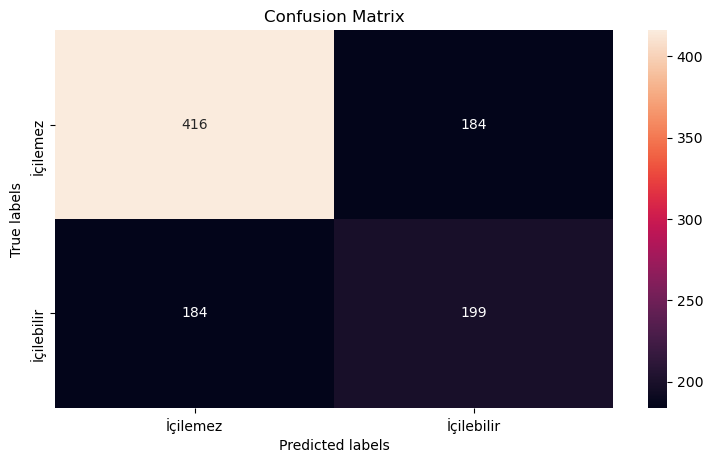

In [74]:
m = SVC()
m.fit(X_train_under_med, y_train_under)
cm = confusion_matrix(y_test_under, m.predict(X_test_under_med))

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['İçilemez', 'İçilebilir']); ax.yaxis.set_ticklabels(['İçilemez', 'İçilebilir'])

### Resampling

In [75]:
X = data.drop(columns=['Potability'])
y = data['Potability']

In [76]:
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)
train_set_res = pd.concat([pd.DataFrame(X_train_res), pd.DataFrame(y_train_res)], axis=1)

In [77]:
zero  = train_set_res[train_set_res['Potability']==0]   
one = train_set_res[train_set_res['Potability']==1]  
from sklearn.utils import resample
data_minority_upsampled = resample(one, replace = True, n_samples = 1398) 
train_set_upsampled = pd.concat([zero, data_minority_upsampled])

from sklearn.utils import shuffle
train_set_upsampled = shuffle(train_set_upsampled) # shuffling so that there is particular sequence

X_train_res = train_set_upsampled.drop(columns=['Potability'])
y_train_res = train_set_upsampled['Potability']

In [78]:
train_set_upsampled.Potability.value_counts()

0    1398
1    1398
Name: Potability, dtype: int64

In [79]:
# Median Imputation with resampled data
median_imp = SimpleImputer(missing_values=np.nan, strategy='median')
X_train_res_med = median_imp.fit_transform(X_train_res)
X_test_res_med = median_imp.transform(X_test_res)
scaler = StandardScaler()
scaler.fit(X_train_res_med)
X_train_res_med = scaler.transform(X_train_res_med)
X_test_res_med = scaler.transform(X_test_res_med)

In [80]:
results_res_med = []
names_res_med = []
finalResults_res_med = []

for name,model in models:
    model.fit(X_train_res_med, y_train_res)
    model_results = model.predict(X_test_res_med)
    score = accuracy_score(y_test_res, model_results)
    results.append(score)
    names.append(name)
    finalResults_res_med.append((name,score))
    
finalResults_res_med.sort(key=lambda k:k[1],reverse=True)

In [81]:
print("Median Imputation with Resampled Data Results")
finalResults_res_med

Median Imputation with Resampled Data Results


[('RF', 0.659206510681587),
 ('KNN', 0.6174974567650051),
 ('SVC', 0.6113936927772126),
 ('NuSVC', 0.6113936927772126),
 ('XGB', 0.5920651068158698),
 ('DTC', 0.5757884028484231),
 ('ADA', 0.5656154628687691),
 ('Perc', 0.5564598168870803),
 ('PAC', 0.5218718209562564),
 ('NC', 0.49949135300101727),
 ('BNB', 0.4893184130213632),
 ('LR', 0.4883011190233978),
 ('SGDC', 0.4862665310274669)]

<ipython-input-82-8721e9b8f041>:11: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.text(i, round(y[i],2),round(y[i],2), ha = 'center',


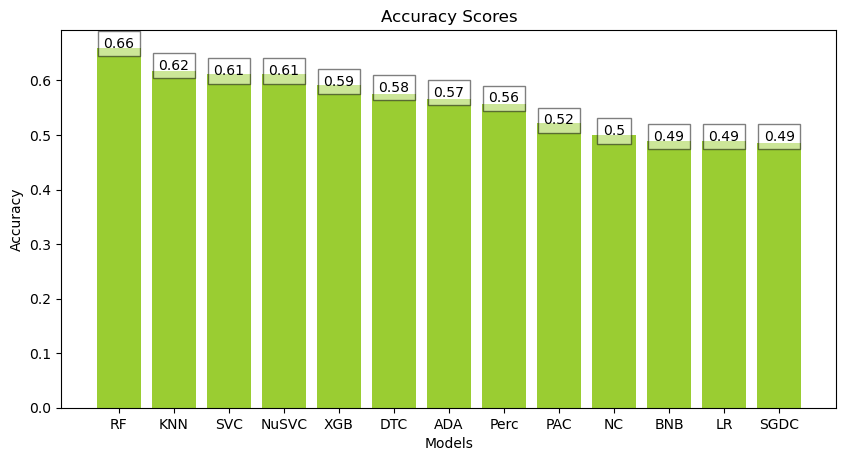

In [82]:
%matplotlib inline
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':100})
#plt.bar(pd.DataFrame(finalResults_med)[0],pd.DataFrame(finalResults_med)[1], color = "goldenrod")
#plt.xlabel('Models')
#plt.ylabel("Accuracy")
#plt.title('Accuracy Scores')
#plt.show()

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, round(y[i],2),round(y[i],2), ha = 'center',
                 Bbox = dict(facecolor = 'white', alpha = .5))

        
        
if __name__ == '__main__':
    
    # creating data on which bar chart will be plot
    x = pd.DataFrame(finalResults_res_med)[0]
    y = pd.DataFrame(finalResults_res_med)[1]
      
    # setting figure size by using figure() function 
    plt.figure(figsize = (10,5))
    
    # making the bar chart on the data with color red
    plt.bar(x, y, color = 'yellowgreen')
      
    # calling the function to add value labels
    addlabels(x, y)
      
    # giving title to the plot
    plt.title("Accuracy Scores")
      
    # giving X and Y labels
    plt.xlabel("Models")
    plt.ylabel("Accuracy")
      
    # visualizing the plot
    plt.show()

In [83]:
# KNN Imputation with resampled data
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
X_train_res_KNN = imputer.fit_transform(X_train_res)
X_test_res_KNN = imputer.transform(X_test_res)
scaler = StandardScaler()
scaler.fit(X_train_res_KNN)
X_train_res_KNN = scaler.transform(X_train_res_KNN)
X_test_res_KNN = scaler.transform(X_test_res_KNN)

In [84]:
results_res_KNN = []
names_res_KNNd = []
finalResults_res_KNN = []

for name,model in models:
    model.fit(X_train_res_KNN, y_train_res)
    model_results = model.predict(X_test_res_KNN)
    score = accuracy_score(y_test_res, model_results)
    results.append(score)
    names.append(name)
    finalResults_res_KNN.append((name,score))
    
finalResults_res_KNN.sort(key=lambda k:k[1],reverse=True)

In [85]:
print("Median Imputation with Resampled Data Results")
finalResults_res_KNN

Median Imputation with Resampled Data Results


[('RF', 0.6439471007121058),
 ('KNN', 0.6083418107833164),
 ('NuSVC', 0.6063072227873856),
 ('DTC', 0.5961342828077314),
 ('SVC', 0.595116988809766),
 ('XGB', 0.590030518819939),
 ('SGDC', 0.5686673448626653),
 ('Perc', 0.5574771108850458),
 ('ADA', 0.5473041709053916),
 ('PAC', 0.5289928789420142),
 ('NC', 0.49643947100712105),
 ('BNB', 0.49542217700915564),
 ('LR', 0.47812817904374366)]

### SMOTE Oversampling

In [86]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 

sm = SMOTE(sampling_strategy = 'minority', random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train_med, y_train_med)

In [87]:
pd.DataFrame(X_train_smote).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2762 entries, 0 to 2761
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2762 non-null   float64
 1   1       2762 non-null   float64
 2   2       2762 non-null   float64
 3   3       2762 non-null   float64
 4   4       2762 non-null   float64
 5   5       2762 non-null   float64
 6   6       2762 non-null   float64
 7   7       2762 non-null   float64
 8   8       2762 non-null   float64
dtypes: float64(9)
memory usage: 194.3 KB


In [88]:
models =[("LR", LogisticRegression(max_iter=1000)),("SVC", SVC()),('KNN',KNeighborsClassifier(n_neighbors=10)),
         ("DTC", DecisionTreeClassifier()),
        ("SGDC", SGDClassifier()),("Perc", Perceptron()),("NC",NearestCentroid()),
        ("NuSVC", NuSVC()),("BNB", BernoulliNB()),
         ('RF',RandomForestClassifier()),('ADA',AdaBoostClassifier()),
        ('XGB',GradientBoostingClassifier()),('PAC',PassiveAggressiveClassifier())]

results = []
names = []
finalResults_smote = []

for name,model in models:
    model.fit(X_train_smote, y_train_smote)
    model_results = model.predict(X_test_med)
    score = accuracy_score(y_test_med, model_results)
    results.append(score)
    names.append(name)
    finalResults_smote.append((name,score))
    
finalResults_smote.sort(key=lambda k:k[1],reverse=True)

In [89]:
print("Smote with Median Imputation Test Results")
finalResults_smote

Smote with Median Imputation Test Results


[('RF', 0.6642929806714141),
 ('SVC', 0.6378433367243134),
 ('XGB', 0.6337741607324516),
 ('NuSVC', 0.6144455747711088),
 ('KNN', 0.6032553407934893),
 ('ADA', 0.5818921668362157),
 ('DTC', 0.5656154628687691),
 ('NC', 0.5391658189216684),
 ('LR', 0.5228891149542217),
 ('BNB', 0.508646998982706),
 ('PAC', 0.46185147507629704),
 ('Perc', 0.4577822990844354),
 ('SGDC', 0.4496439471007121)]

[Text(0, 0.5, 'İçilemez'), Text(0, 1.5, 'İçilebilir')]

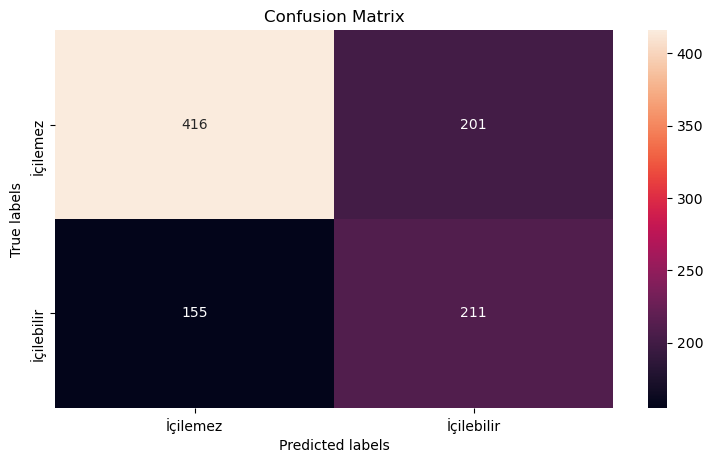

In [90]:
m = SVC()
m.fit(X_train_smote, y_train_smote)
cm = confusion_matrix(y_test_med, m.predict(X_test_med))

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['İçilemez', 'İçilebilir']); ax.yaxis.set_ticklabels(['İçilemez', 'İçilebilir'])

<ipython-input-91-b5e77db80839>:11: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.text(i, round(y[i],2),round(y[i],2), ha = 'center',


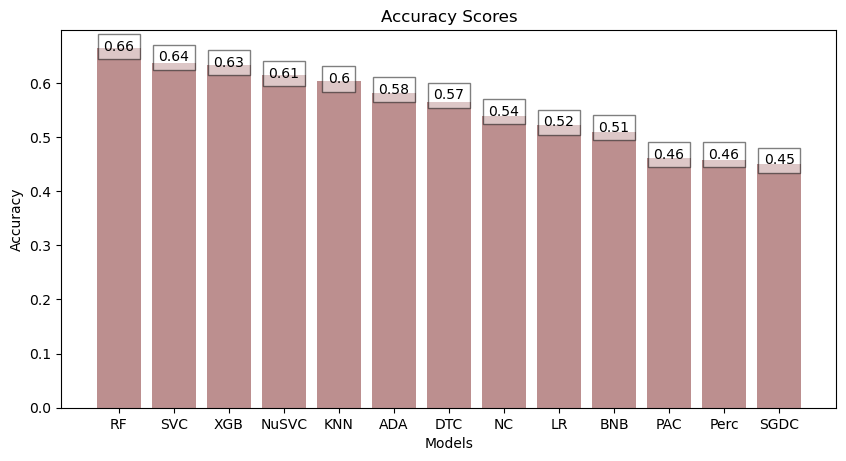

In [91]:
%matplotlib inline
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':100})
#plt.bar(pd.DataFrame(finalResults_med)[0],pd.DataFrame(finalResults_med)[1], color = "goldenrod")
#plt.xlabel('Models')
#plt.ylabel("Accuracy")
#plt.title('Accuracy Scores')
#plt.show()

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, round(y[i],2),round(y[i],2), ha = 'center',
                 Bbox = dict(facecolor = 'white', alpha = .5))

        
        
if __name__ == '__main__':
    
    # creating data on which bar chart will be plot
    x = pd.DataFrame(finalResults_smote)[0]
    y = pd.DataFrame(finalResults_smote)[1]
      
    # setting figure size by using figure() function 
    plt.figure(figsize = (10,5))
    
    # making the bar chart on the data with color red
    plt.bar(x, y, color = 'rosybrown')
      
    # calling the function to add value labels
    addlabels(x, y)
      
    # giving title to the plot
    plt.title("Accuracy Scores")
      
    # giving X and Y labels
    plt.xlabel("Models")
    plt.ylabel("Accuracy")
      
    # visualizing the plot
    plt.show()

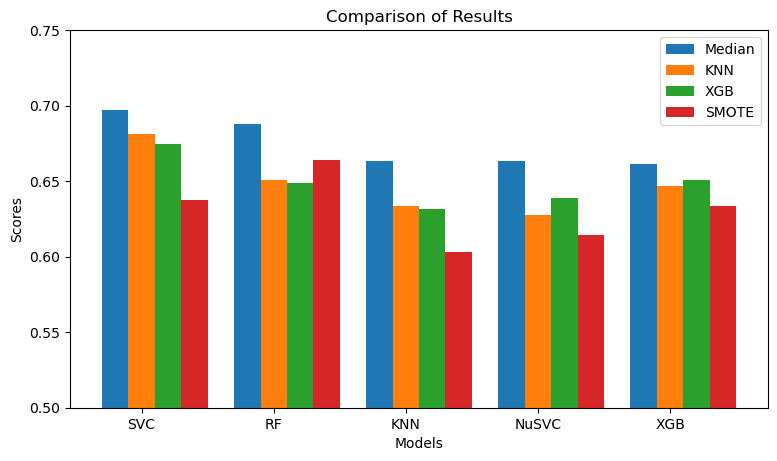

In [92]:
x = np.arange(5)
width = 0.2
plt.bar(x-0.2,pd.DataFrame(finalResults_med).set_index(0).loc[['SVC','RF','KNN','NuSVC','XGB']][1], width)
plt.bar(x,pd.DataFrame(finalResults_KNN).set_index(0).loc[['SVC','RF','KNN','NuSVC','XGB']][1], width)
plt.bar(x+0.2,pd.DataFrame(finalResults_xgb).set_index(0).loc[['SVC','RF','KNN','NuSVC','XGB']][1], width)
plt.bar(x+0.4,pd.DataFrame(finalResults_smote).set_index(0).loc[['SVC','RF','KNN','NuSVC','XGB']][1], width)
plt.xticks(x, ['SVC', 'RF', 'KNN', 'NuSVC', 'XGB'])
plt.xlabel("Models")
plt.ylabel("Scores")
plt.title("Comparison of Results")
plt.ylim((0.5,0.75))
plt.legend(["Median", "KNN", "XGB","SMOTE"])
plt.show()

In [93]:
pd.DataFrame(finalResults_med).set_index(0).loc[['SVC','RF','KNN','NuSVC','XGB']][1]

0
SVC      0.696846
RF       0.687691
KNN      0.663276
NuSVC    0.663276
XGB      0.661241
Name: 1, dtype: float64